In [1]:
# Importa o módulo 'files' do Google Colab para lidar com upload de arquivos manuais
from google.colab import files

# Abre uma janela para o usuário selecionar arquivos do seu computador e enviá-los para o ambiente do Colab
# O resultado é armazenado no dicionário 'uploaded', onde as chaves são os nomes dos arquivos
uploaded = files.upload()

Saving cars.xls to cars.xls


In [2]:
import pandas as pd

#Le o arquivo
df = pd.read_excel('cars.xls')

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


/tmp/ipython-input-4-1458110735.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean()


                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


<Axes: xlabel='Mileage'>

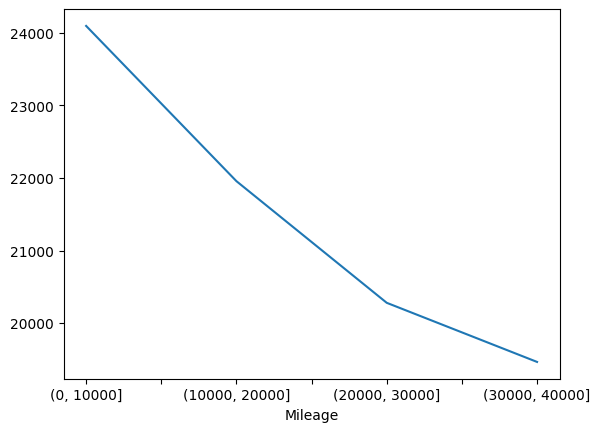

In [4]:
%matplotlib inline

import numpy as np

# Cria um novo DataFrame apenas com as colunas 'Mileage' (quilometragem) e 'Price' (preço)
df1 = df[['Mileage', 'Price']]

# Define os intervalos (bins) de quilometragem: 0-10.000, 10.000-20.000, ..., até 50.000
bins = np.arange(0, 50000, 10000)

# Agrupa os dados de df1 com base nesses intervalos de 'Mileage' e calcula a média do preço em cada grupo
groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean()

# Exibe as 5 primeiras linhas dos grupos agrupados com suas médias
print(groups.head())

# Plota um gráfico de linha mostrando o preço médio em cada faixa de quilometragem
groups['Price'].plot.line()

In [5]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Suponha que seu DataFrame já esteja carregado como df
# Seleciona as variáveis independentes (sem constante)
x = df[['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']]

# Variável dependente: preço
y = df['Price']

# Padroniza os dados
scale = StandardScaler()
x[['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']] = scale.fit_transform(x.values)

# Treina o modelo de regressão linear múltipla SEM constante
est = sm.OLS(y, x).fit()

# Mostra o resumo do modelo (coeficientes, R² etc.)
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.079
Model:                            OLS   Adj. R-squared (uncentered):              0.072
Method:                 Least Squares   F-statistic:                              11.35
Date:                Mon, 23 Jun 2025   Prob (F-statistic):                    3.38e-12
Time:                        11:48:08   Log-Likelihood:                         -9200.6
No. Observations:                 804   AIC:                                  1.841e+04
Df Residuals:                     798   BIC:                                  1.844e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/tmp/ipython-input-5-1171719493.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']] = scale.fit_transform(x.values)


In [17]:
# Dados do novo carro
#10000 — Quilometragem (Mileage) do carro (10.000 km)
#6 — Número de cilindros (Cylinder)
#4 — Número de portas (Doors)
#1 — Possui controle de cruzeiro (Cruise) — sim
#1 — Possui sistema de som especial (Sound) — sim
#0 — Não possui bancos de couro (Leather) — não

carro_novo = [[10000, 6, 4, 1, 1, 0]]

# Padroniza os dados
entrada = scale.transform(carro_novo)

# Faz a previsão
predicted = est.predict(entrada[0])
print(f"Preço estimado: R$ {predicted[0]:,.2f}")

Preço estimado: R$ 1,803.11


Diferente do modelo apresentado no curso, que utilizava apenas 3 variáveis independentes (Mileage, Cylinder e Doors), neste exercício eu testei a análise incluindo 6 variáveis (Mileage, Cylinder, Doors, Cruise, Sound e Leather).

O objetivo foi testar se a adição dessas variáveis melhora o desempenho do modelo, analisando as mudanças nos coeficientes, no R² e na significância estatística.


In [15]:
# Dados do novo carro
#5000 — Quilometragem (Mileage) do carro (10.000 km)
#6 — Número de cilindros (Cylinder)
#4 — Número de portas (Doors)
#1 — Possui controle de cruzeiro (Cruise) — sim
#1 — Possui sistema de som especial (Sound) — sim
#1 — Não possui bancos de couro (Leather) — sim

carro_novo = [[5000, 6, 4, 1, 1, 1]]

# Padroniza os dados
entrada = scale.transform(carro_novo)

# Faz a previsão
predicted = est.predict(entrada[0])
print(f"Preço estimado: R$ {predicted[0]:,.2f}")

Preço estimado: R$ 5,982.84


No codigo acima eu apenas abaixei a quilometragem do carro e adicionei bancos de couro, para ver qual seria o valor que receberia do modelo.